In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'patsy'

In [3]:
import os
print(os.listdir('.'))

['.git', '.idea', 'conv1d_test.py', 'eda.ipynb', 'first_example_second_attempt.py', 'flag.txt', 'kaggle_kernel.py', 'README.md', 'sample_submission.csv', 'SARIMA_test.py', 'test.csv', 'train.csv']


Loading data using appropriate parser and taking a first glance

In [4]:
parser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
train_data = pd.read_csv("./train.csv", parse_dates=["date"], index_col="date", date_parser=parser)
test_data = pd.read_csv("./test.csv", parse_dates=["date"], index_col="date", date_parser=parser)
train_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [5]:
train_data.shape, test_data.shape

((913000, 3), (45000, 3))

In [6]:
train_data.head(10)

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
2013-01-06,1,1,12
2013-01-07,1,1,10
2013-01-08,1,1,9
2013-01-09,1,1,12


In [7]:
test_data.head(10)

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1
2018-01-06,5,1,1
2018-01-07,6,1,1
2018-01-08,7,1,1
2018-01-09,8,1,1


Visualizations:

In this part I will:

- Plot statistics of sales vs. stores and items to get a sense of data
- Plot original series
- Plot rolling statistics
- Perform decomposition into trend, seasonality and residual parts and plot each part
- Plot autocorrleation and partial-autocorrelations (these will help determining 

In [8]:
# first step, getting a table of average sales of stores per item

store_df = train_data.copy()
sales_table = pd.pivot_table(store_df, index='store', values=['sales'], columns='item',
                                  aggfunc=np.mean)
# Pivoted dataframe
print(sales_table)

           sales                                                         \
item          1          2          3          4          5          6    
store                                                                     
1      19.971522  53.148959  33.208105  19.956188  16.612815  53.060789   
2      28.173604  75.316539  46.992333  28.234940  23.540526  74.945235   
3      25.070099  66.804491  41.771084  25.116101  20.857612  67.007119   
4      22.938664  61.715225  38.548193  23.086528  19.525192  61.270537   
5      16.739321  44.488499  27.835706  16.776561  14.086528  44.564622   
6      16.717963  44.533954  27.811062  16.754107  13.893209  44.503834   
7      15.159365  40.717963  25.531216  15.358160  12.733844  40.703724   
8      26.983571  71.656627  45.076123  26.948521  22.427711  71.958379   
9      23.325849  61.792442  38.535049  23.150055  19.272180  61.412377   
10     24.736035  65.566813  41.113363  24.721249  20.637459  65.612267   

                        

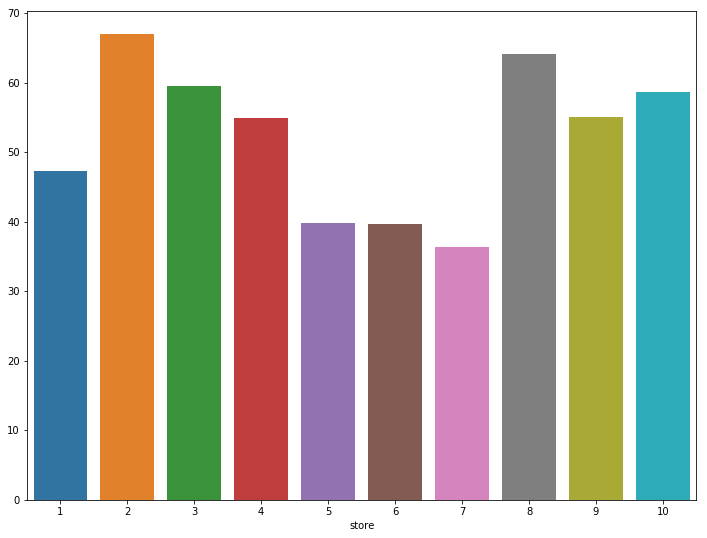

In [9]:
avg_sale_per_store = sales_table.sum(axis=1) / 50
plt.subplots(figsize=(12, 9))
sns.barplot(avg_sale_per_store.index, avg_sale_per_store)

It loooks like store 2 and store 8 have the best record for sales while 5-7 are not doing well. Lets look at the same now in terms of the items.

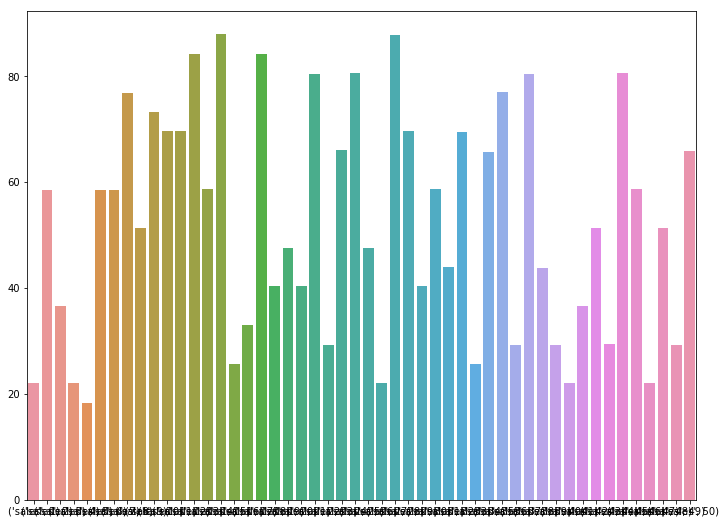

In [10]:
avg_sale_per_item = sales_table.sum(axis=0) / 10
plt.subplots(figsize=(12, 9))
sns.barplot(avg_sale_per_item.index, avg_sale_per_item)

It look slike there are some stark differences between average sales of each item. 

Next, we plot the time series data, since we have data for 50 item across 10 stores we essentially have 500 time series. 
We need to separate them first and then look at a few. 
    

In [11]:
# amount of data points for all 10 items across 5 stores :
# length of data : (5 * 365 + 1 day for leap year 2012) * 5 * 10 = 913000
series_dict = {}
for store_idx in range(1, 10):
    for item_idx in range(1, 50):
        key = "{}-{}".format(store_idx, item_idx)
        store_bool = train_data['store'] == store_idx
        item_bool = train_data["item"] == item_idx
        s = train_data[store_bool & item_bool]["sales"]
        series_dict[key] = s

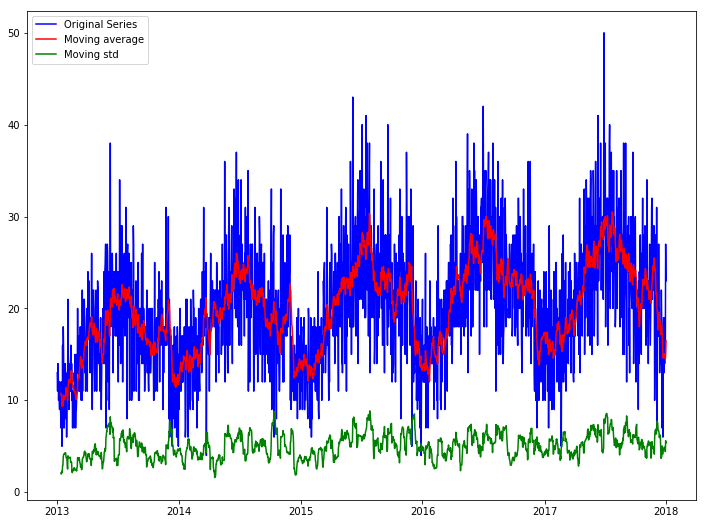

In [12]:
ts = series_dict['1-1']  # time series for store 2 and item 10
moving_avg = ts.rolling(12).mean()  # choosing a window of 12 for moving average
moving_std = ts.rolling(12).std()

#plotting
f, ax = plt.subplots(figsize=(12, 9))
plt.plot(ts, color="blue", label="Original Series")
plt.plot(moving_avg, color='red', label="Moving average")
plt.plot(moving_std, color='green', label="Moving std")
plt.legend()
plt.show()

The series is clearly non-stationary with seasonality and an upward, although mild, trend. 

Lets try and decompose it into season, trend and residual components and look at each one individually.

In [13]:
decopmosed = statsmodels.tsa.seasonal_decompose(ts)
plt.plot(decopmosed.observed, color="blue", label="Observed series")
plt.plot(decopmosed.trend, color="red", label="Trend")
plt.plot(decopmosed.seasonal, color="green", label="Seasonality")
plt.plot(decopmosed.resid, color="black", label="Residual series")
plt.legend()
plt.show()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'